<a href="https://colab.research.google.com/github/mazensomran/Project-Water-aggregation-from-air-/blob/main/Project_%22Water_aggregation_from_air%22_analysing_data_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Preparing the data frame

In [2]:
df = pd.read_excel(r'/content/drive/MyDrive/Data.xlsx', engine='openpyxl')
df.head()

,Date,Time,Temperature,Humedity,Fan,Compressor speed,tracking,Water amount
0,2023-07-19,09:00:00,30.0,58,0,3500,0,74
1,2023-07-19,10:00:00,31.8,58,0,3500,0,74
2,2023-07-19,11:00:00,31.2,59,0,3500,0,74
3,2023-07-19,12:00:00,32.0,60,0,3500,0,74
4,2023-07-19,13:00:00,33.0,62,0,3500,0,74


In [3]:
df.describe()

,Temperature,Humedity,Fan,Compressor speed,tracking,Water amount
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,31.996032,63.297619,0.666667,3055.555556,0.333333,76.400794
std,2.151231,10.058530,0.472343,438.315420,0.472343,7.754839
min,24.700000,43.000000,0.000000,2500.000000,0.000000,62.000000
25%,31.000000,56.000000,0.000000,2500.000000,0.000000,70.000000
50%,32.000000,63.000000,1.000000,3000.000000,0.000000,75.500000
75%,33.500000,68.000000,1.000000,3500.000000,1.000000,82.000000
max,37.000000,83.000000,1.000000,3500.000000,1.000000,92.000000


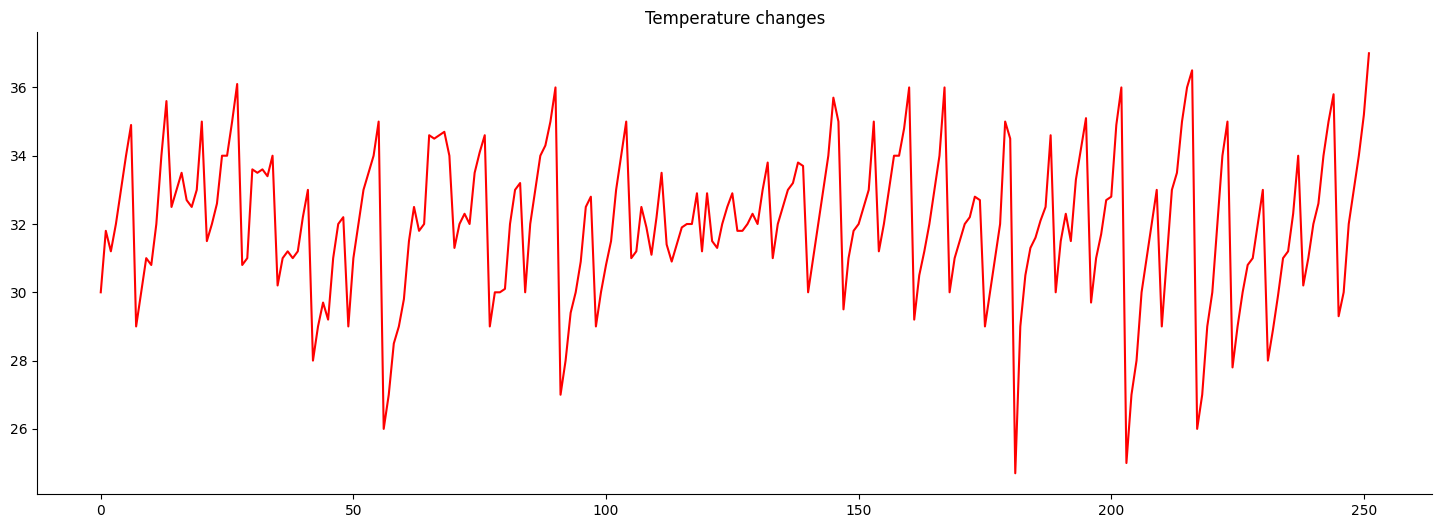

In [4]:
df['Temperature'].plot(kind='line', figsize=(18, 6), title='Temperature changes', color = 'r')
plt.gca().spines[['top', 'right']].set_visible(False)

A histogram for temperature degrees

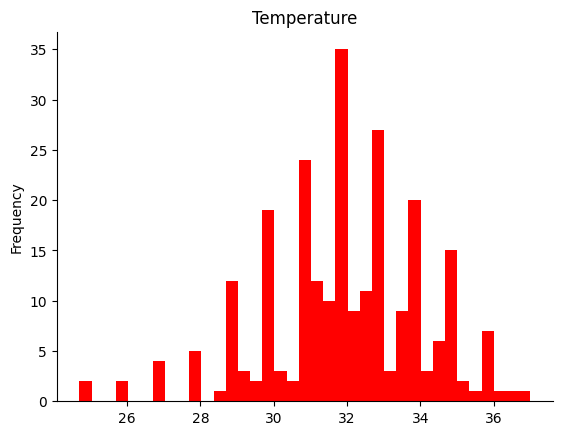

In [5]:
df['Temperature'].plot(kind='hist', bins=37, title='Temperature', color='r')
plt.gca().spines[['top', 'right',]].set_visible(False)

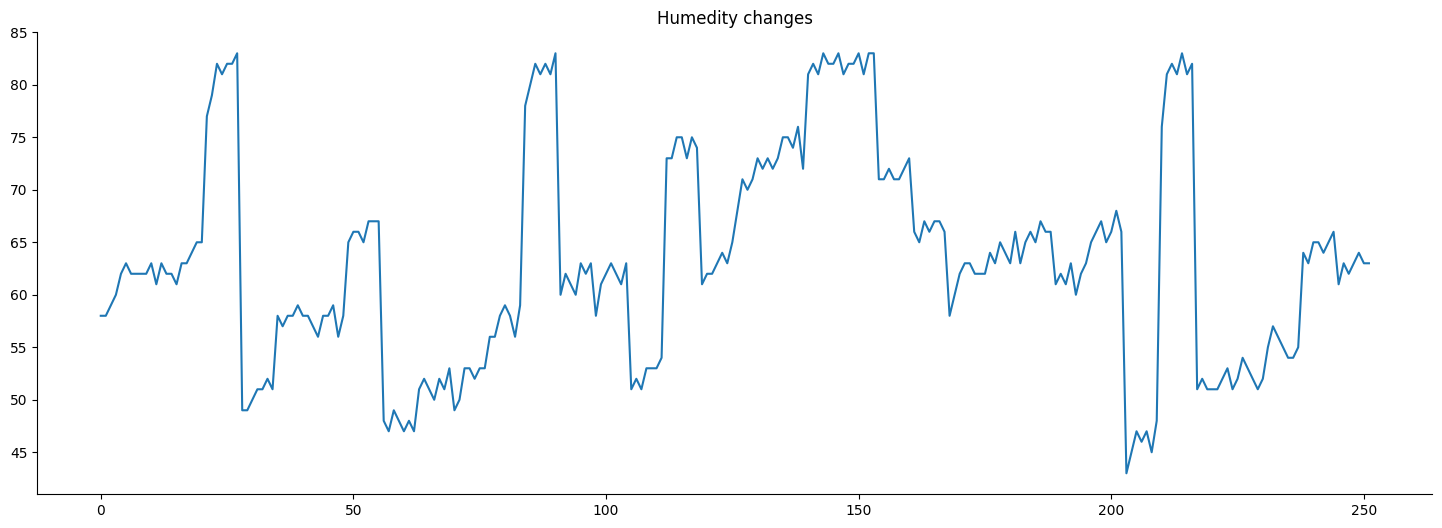

In [6]:
df['Humedity'].plot(kind='line', figsize=(18, 6), title='Humedity changes')
plt.gca().spines[['top', 'right']].set_visible(False)

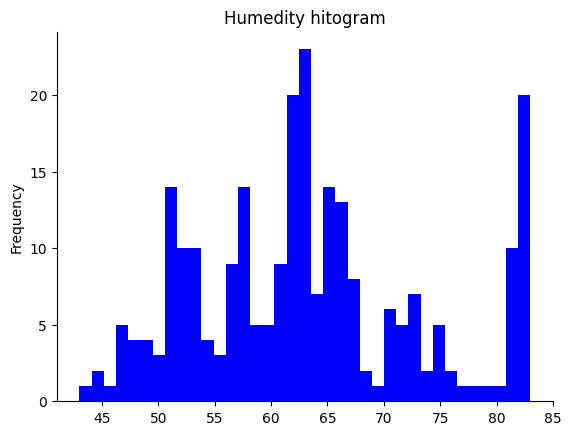

In [7]:
df['Humedity'].plot(kind='hist', bins=37, title='Humedity hitogram', color='b')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temperature,Humedity,Fan,Compressor speed,tracking,Water amount
Temperature,1.000000,0.351469,-0.033458,0.060445,0.024832,0.078643
Humedity,0.351469,1.000000,-0.093080,-0.067021,-0.085533,-0.101083
Fan,-0.033458,-0.093080,1.000000,-0.179605,0.500000,0.586978
Compressor speed,0.060445,-0.067021,-0.179605,1.000000,-0.089803,0.260077
tracking,0.024832,-0.085533,0.500000,-0.089803,1.000000,0.808500
Water amount,0.078643,-0.101083,0.586978,0.260077,0.808500,1.000000


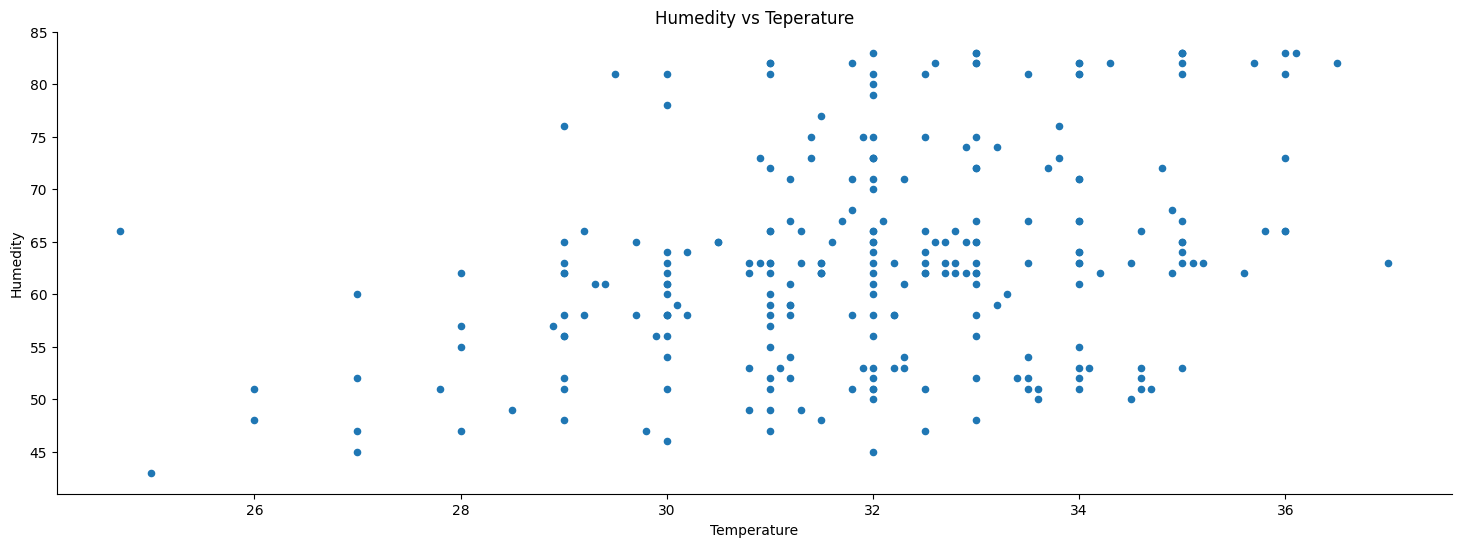

In [9]:
df.plot(kind='scatter', x='Temperature', y='Humedity',title='Humedity vs Teperature',figsize=(18, 6) )
plt.gca().spines[['top', 'right',]].set_visible(False)

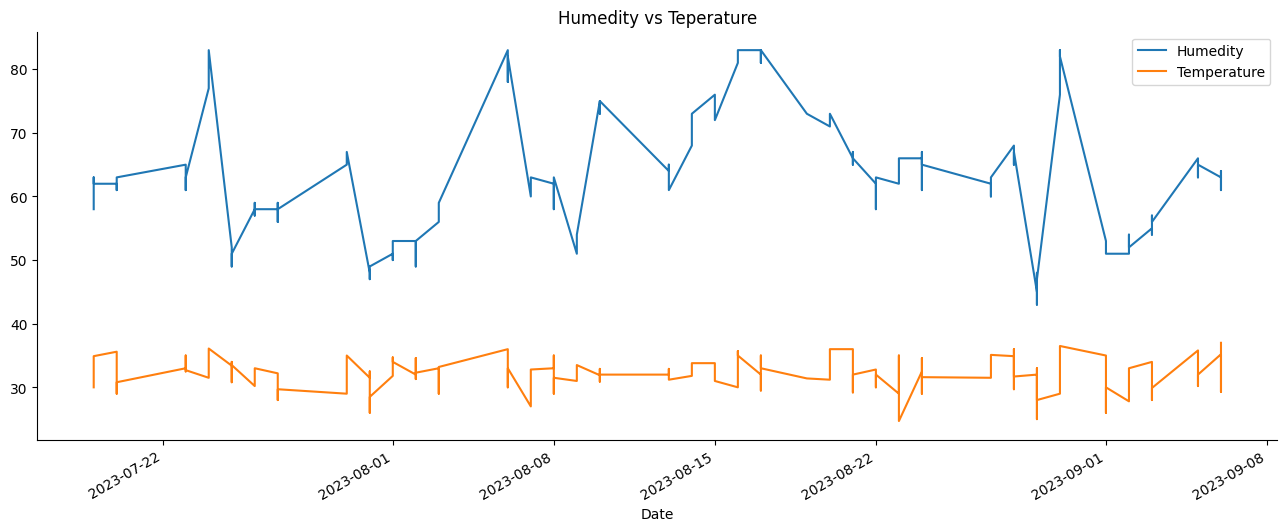

In [10]:
df.plot(kind='line', x='Date', y=['Humedity','Temperature'] ,title='Humedity vs Teperature',figsize=(16, 6) )
plt.gca().spines[['top', 'right',]].set_visible(False)

#Data analysis

Analyse the daily average of temperature

In [11]:
avg_temp = df.groupby('Date', as_index=False).mean()
avg_temp['Day'] = avg_temp.index
avg_temp.head()

<ipython-input-11-ef477f21f2cc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_temp = df.groupby('Date', as_index=False).mean()


,Date,Temperature,Humedity,Fan,Compressor speed,tracking,Water amount,Day
0,2023-07-19,32.414286,60.285714,0.0,3500.0,0.0,74.000000,0
1,2023-07-20,31.771429,62.142857,0.0,3500.0,0.0,70.000000,1
2,2023-07-23,33.171429,63.285714,0.0,3500.0,0.0,76.000000,2
3,2023-07-24,33.600000,80.857143,0.0,3500.0,0.0,78.000000,3
4,2023-07-25,32.842857,50.428571,1.0,3500.0,0.0,77.714286,4


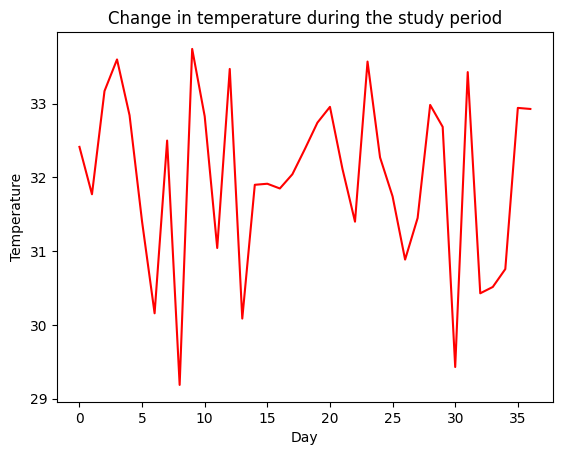

In [12]:
plt.plot( avg_temp['Day'], avg_temp['Temperature'], color='r')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Change in temperature during the study period')
plt.show()

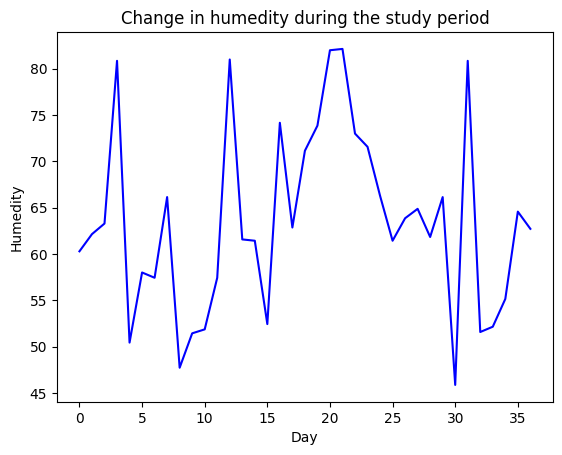

In [13]:
plt.plot( avg_temp['Day'], avg_temp['Humedity'], color='b')
plt.xlabel('Day')
plt.ylabel('Humedity')
plt.title('Change in humedity during the study period')
plt.show()